# **Example 2.5. A neural network**
In this example we discuss how to use the scikit-learn instances to construct a basic machine learning pipeline.

In [ ]:
import numpy as np

class Data:
    def __init__(self, N, sigma):
        self.N=N #Number of data per cluster.
        self.sigma=sigma #standard deviation of the clusters.

    def data_xor(self, classes):
        X=self.sigma*np.random.randn(2,4*self.N) # Generate 4*N random vectors (gaussian) centered around zero
        mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]]) # define four means
        M=np.ones((self.N,2))*mean[:,0] # Means of the first cluster
        y=np.ones((1,self.N))*classes[0] # Labels of the first cluster
        for i in range(1,4):
            m=np.ones((self.N,2))*mean[:,i] # Means of cluster i
            M=np.concatenate((M,m))     #Concatenate all means
            y=np.concatenate((y,np.ones((1,self.N))*classes[i]),axis=1) # concatenate labels
        M=M.T
        X=X+M # Add means to the data.
        return X,y

    def data_circle(self):
        theta=np.random.rand(1,self.N)*np.pi*2
        rho=np.random.randn(1,self.N)*self.sigma+1
        X1=rho*np.block([[np.cos(theta)],[np.sin(theta)]]) #circular data corresponding to class 1

        theta=np.random.rand(1,self.N)*2*np.pi
        rho=np.random.randn(1,self.N)*self.sigma+0.8
        X2=rho*np.block([[np.cos(theta)],[np.sin(theta)]])

        y=np.concatenate((0*np.ones((1,self.N)),np.ones((1,self.N))),axis=1) # labels
        X=np.concatenate((X1,X2),axis=1)
        return X,y
#The class definition ends here.

In [ ]:
np.random.seed(30) #allows to reproduce the same results.
N=100; sigma=0.6 #attributes for xor.
classes=[0,1,1,0] #attribute for xor.
T=Data(N,sigma) #define the object corresponding to xor data.
X,y=T.data_xor(classes) #method with instance variable classes.
X=np.transpose(X) #Features
y=np.ravel(y) #Labels
print(X.shape,y.shape)

(400, 2) (400,)


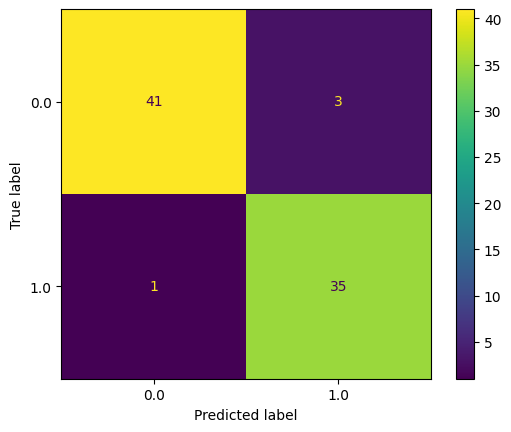

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Apply all the transformation on the training set and train an mlp model.
pipeline_mlp=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('mlp_classifier',MLPClassifier(hidden_layer_sizes=[10],max_iter =10000))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_mlp.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(pipeline_mlp, X_test, y_test)


plt.show()


In [ ]:
print(MLPClassifier.__doc__)

Multi-layer Perceptron classifier.

    This model optimizes the log-loss function using LBFGS or stochastic
    gradient descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the f